# Facebook Posts Lifetime Impact
Created by: Stefan Lauren (stefan.lauren@yahoo.com)

**TASK**

The objective of this analysis is to explore the Facebook post data to determine the factors contributing to the lifetime impact of the post.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from scipy import stats
from scipy.stats import norm
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## 1. Data Collection

In [3]:
df = pd.read_csv('dataset_Facebook.csv', sep=';')

## 2. Data Exploration

In [4]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


The data is loaded successfully

In [5]:
df.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

There is a total of 19 features. For input features of the model, I can only use 7 of them, which are 'Page total likes', 'Category', 'Type', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid'. The other 12 features will be the prediction targets.

In [4]:
df.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   499 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

In [5]:
df.nunique()

Page total likes                                                        90
Type                                                                     4
Category                                                                 3
Post Month                                                              12
Post Weekday                                                             7
Post Hour                                                               22
Paid                                                                     2
Lifetime Post Total Reach                                              485
Lifetime Post Total Impressions                                        494
Lifetime Engaged Users                                                 414
Lifetime Post Consumers                                                422
Lifetime Post Consumptions                                             440
Lifetime Post Impressions by people who have liked your Page           491
Lifetime Post reach by pe

**OBSERVATIONS**

1. Page total likes: integer, the total number of people who have liked the Page
2. Type: object, type of the post: Photo, Video, Link, Status
3. Category: integer, value between 1 and 3
4. Post Month: integer, value between 1 and 12 corresponding with the months the post was posted
5. Post Weekday: integer, value between 1 and 7 (Monday - Sunday)
6. Post Hours: integer, value between 1 and 20, and between 22 and 23 representing the hour the post was posted
7. Paid: float, value either 0.0 or 1.0, wheter the post was a paid one or not
8. Lifetime Post Total Reach: integer, the number of people who had any content from a Page or about the Page enter their screen
9. Lifetime Post Total Impressions: integer, the number of times any content from a Page or about the Page entered other people's screen
10. Lifetime Enganged Users: integer, number of users who engage with the post content, by either clicking on the main post or in the comments section
11. Lifetime Post Consumers: integer, number of users who create Consumptions
12. Lifetime Post Consumptions: integer, number of any click that takes place on the main post, whether it creates a story or not
13. Lifetime Post Impressions by people who have liked your Page: integer, the number of people who liked a Page and made an impression on their screen
14. Lifetime Post reach by people who like your Page: integer, the number of people who liked a Page and reach the Page on their screen
15. Lifetime Post People who have liked your Page and engaged with your post: integer, number of users who are engaged users and liking the post
16. comment: integer, the number of comments for the post
17. like: float, the number of likes for the post
18. share: float, the number of shares for the post
19. Total Interactions: integer, the total number of likes, comments, and posts on any content such as photos, videos, notes or links

The categorical features are: Type, Category, Post Month, Post Weekday, Post Hours, Paid

The numerical features are: Page total likes, Lifetime Post Total Reach, Lifetime Post Total Impressions, Lifetime Enganged Users, Lifetime Post Consumers, Lifetime Post Consumptions, Lifetime Post Impressions by people who have liked your Page, Lifetime Post reach by people who like your Page, Lifetime Post People who have liked your Page and engaged with your post, comment, like, share, Total Interactions

**Missing Values**

In [8]:
# Return a dataframe with number of missing values for each feature and its percentage
def check_missing_value(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    pd.set_option('display.max_rows', None)
    return missing_values

In [9]:
check_missing_value(df)

,Total,Percent
share,4,0.8
like,1,0.2
Paid,1,0.2
Total Interactions,0,0.0
Lifetime Post Total Reach,0,0.0
Type,0,0.0
Category,0,0.0
Post Month,0,0.0
Post Weekday,0,0.0
Post Hour,0,0.0


**OBSERVATIONS**

From the above observation, I get that there are several missing values on the data, with 4 missing values in feature 'share', 1 missing value in feature 'like', and 1 missing value in feature 'Paid'. However, the missing values' quantity is small compared to the whole data, marked by the low percentage.

There are three actions that I can take to fix the missing value problem. First, I can drop the entire columns. Second, I can instead drop the corresponding rows. Or finally, I can give a default value for each missing value.
For the current problem, because the number of missing values are considerably small, I will choose to drop just the rows as it will not affect the overall performance of the data. I can do this because after analysing the data, the observations with missing value do not contain critical information.

**More Exploration**

Now, I would like to see some relations between the features and labels.

The input features are:
- 'Page total likes'
- 'Type'
- 'Category'
- 'Post Month'
- 'Post Weekday'
- 'Post Hour'
- 'Paid'

The labels are:
- 'Lifetime Post Total Reach'
- 'Lifetime Post Total Impressions'
- 'Lifetime Engaged Users'
- 'Lifetime Post Consumers'
- 'Lifetime Post Consumptions'
- 'Lifetime Post Impressions by people who have liked your Page'
- 'Lifetime Post reach by people who like your Page'
- 'Lifetime People who have liked your Page and engaged with your post'
- 'comment'
- 'like'
- 'share'
- 'Total Interactions'

First, I want to see the correlation matrix

In [12]:
def plot_correlation(df):
    f,ax = plt.subplots(figsize=(18, 18))
    sns_plot = sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

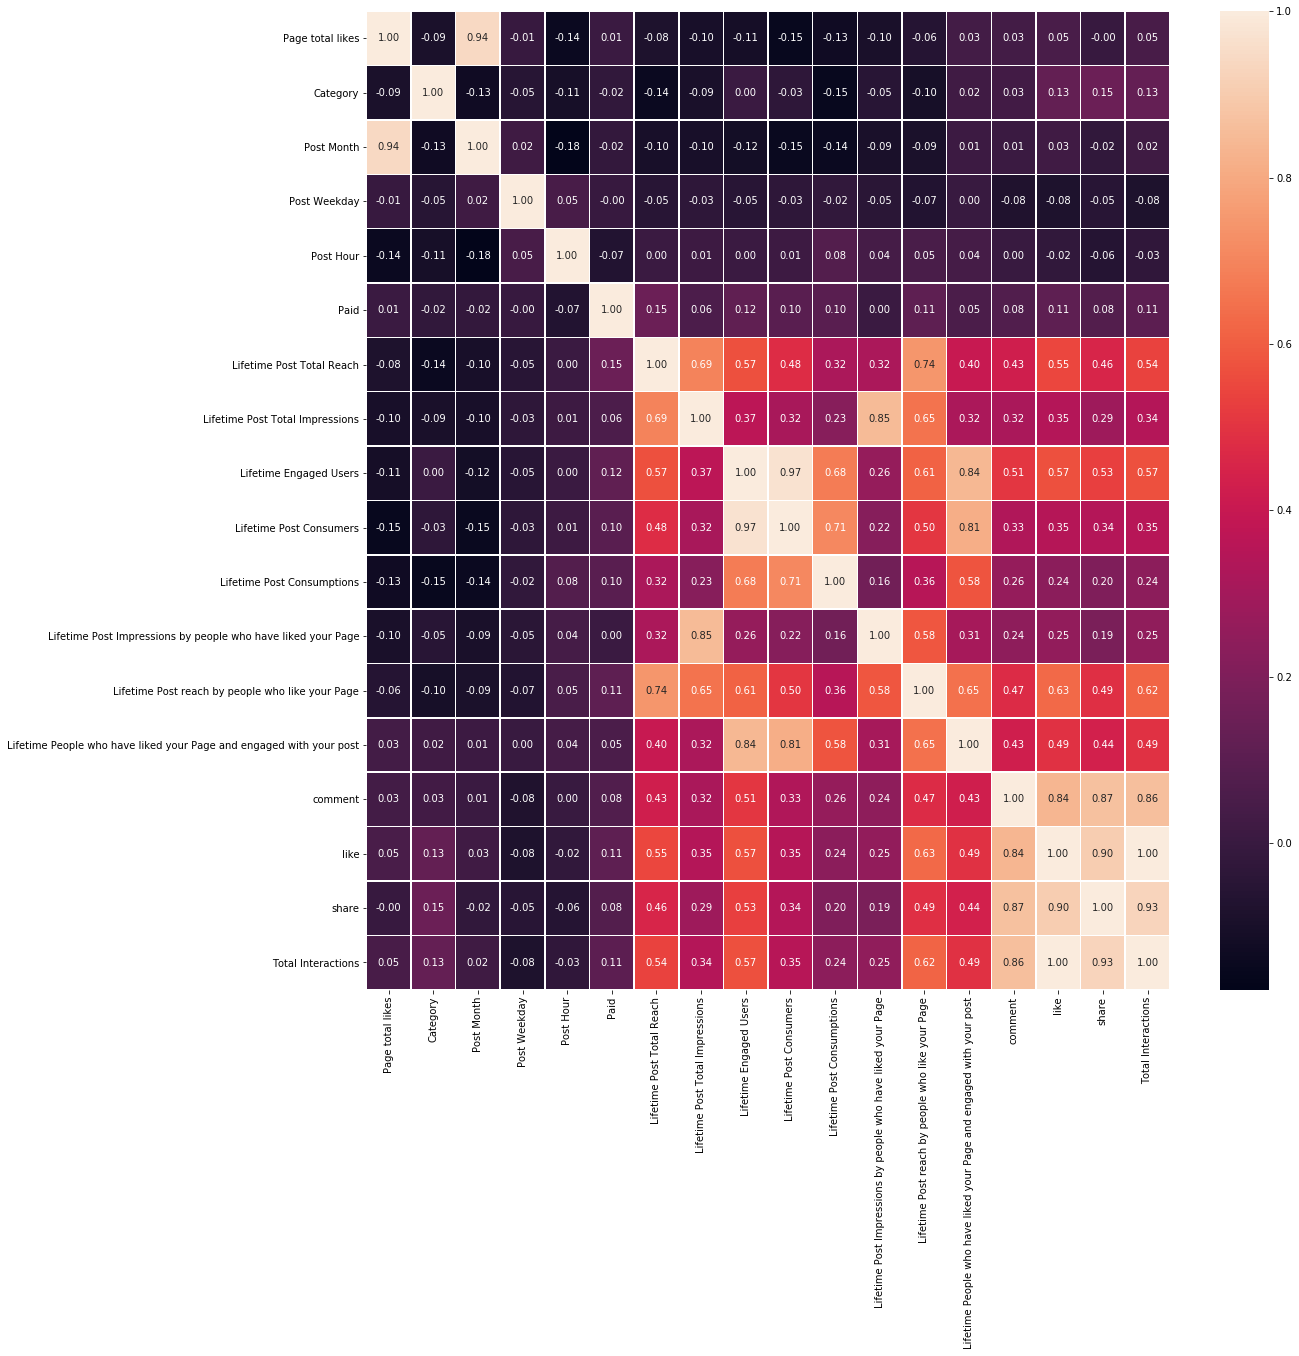

In [13]:
plot_correlation(df)

**OBSERVATIONS**

From the correlation matrix plot, I notice a few things:
1. There are four labels that are closely correlated with each other: 'comment', 'like', 'share', and 'Total Interactions'. Therefore it is safe to say that one of these labels can take a role as the representative.
2. The input features are not closely correlated with the every labels, especially the four labels mentioned above. The correlation value ranges from -0.08 to 0.15 which is very small. This might lead to the problem for the prediction.
3. Input feature 'Post Month' is closely correlated to the other input feature 'Page total likes'. This might mean that there was certain time of the year when people became active on Facebook. However, this did not mean that the posts available in this time had lifetime impacts.
4. Another noticeable relation is between label 'Lifetime Post Consumers' and 'Lifetime Enganged Users'. This actually makes sense as users who interacts with the post are actually enganged as well, for example clicking the link on the post.

**ACTION**

Considering the factor that none of the input features are correlated with the labels, I decide to focus on only label 'Total Interactions' to be the representative of the metric of a good Facebook post. Therefore, now I will try to see 'Total Interactions' in more detail, and the relation between 'Total Interactions' and each of the input features.

In [21]:
df['Total Interactions'].describe()

count     495.000000
mean      213.967677
std       381.677449
min         0.000000
25%        72.000000
50%       125.000000
75%       231.000000
max      6334.000000
Name: Total Interactions, dtype: float64

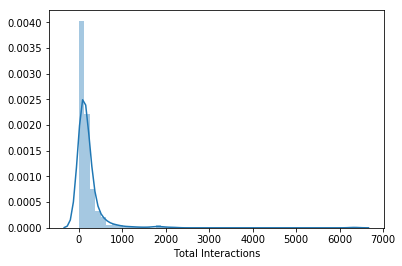

In [22]:
sns.distplot(df['Total Interactions'])

From the description and the histogram plot, 'Total Interactions' stray from the normal distribution. Moreover, it is skewed to the very right side (positive skewness) with a very noticeable peak.

In [10]:
def plot_scatter(feature, target):
    data = pd.concat([df[target], df[feature]], axis=1)
    data.plot.scatter(x=feature, y=target)

In [11]:
def plot_box(feature, target):
    data = pd.concat([df[target], df[feature]], axis=1)
    fig = sns.boxplot(x=feature, y=target, data=data)
    fig.axis(ymin=0)

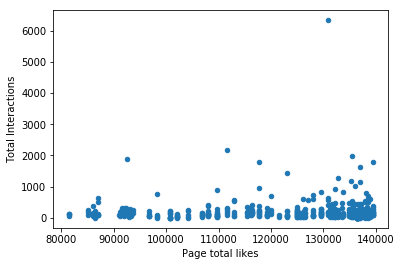

In [7]:
plot_scatter('Page total likes', 'Total Interactions')

The plot above shows a weak relation between 'Page total likes' and 'Total Interactions'. I can see that the data are distributed slightly more to the bigger number of 'Page total likes'. Moreover, on the range 130000 - 140000, there are several values with relatively high 'Total Interactions'. However, the assumption does not work exclusively to that range as there are several other high 'Total Interactions' values with lower 'Page total likes'. Notes that there seems to be an outlier value.

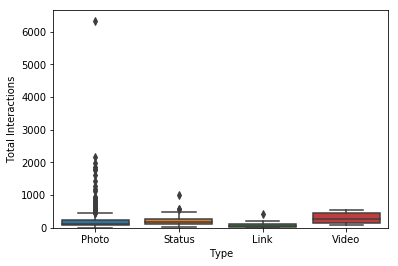

In [12]:
plot_box('Type', 'Total Interactions')

The relation between 'Type' and 'Total Interactions' is more clear as the majority of the posts with high 'Total Interactions' are photos. However, the outlier value also comes from type Photo.

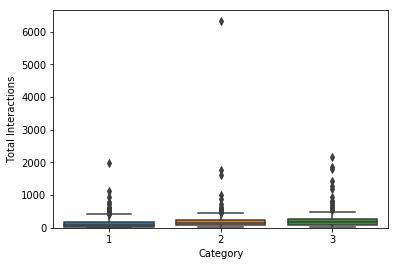

In [13]:
plot_box('Category', 'Total Interactions')

Ignoring the outlier value on category 2, the value are distributed relatively even with respect to the 'Total Interactions'. This input feature might not improve the model for prediction.

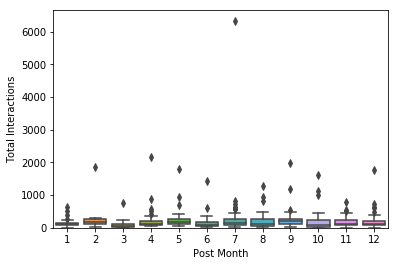

In [14]:
plot_box('Post Month', 'Total Interactions')

The 'Post Month' relates to the 'Total Interactions' in an interesting pattern. It tells me that the posts in Spring (4-5) and Autumn (9-10) seasons usually have higher interactions. On January, March, July (ignore the outlier), and November, the 'Total Interactions' reaches the lowest trend.

Now that from previous observation, I found out that 'Post Month' is closely correlated to 'Page total likes', it might be interesting to see the relation between these features.

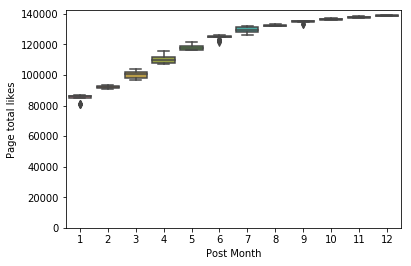

In [15]:
plot_box('Post Month', 'Page total likes')

Clearly they have a linear relation, which means the posts in December are usually get more likes.

That's for the intermezzo, now continuing my analysis:

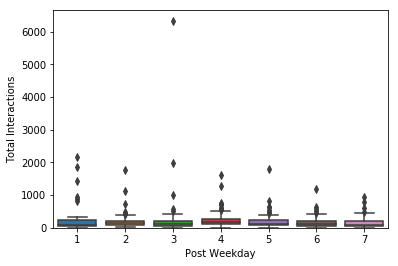

In [16]:
plot_box('Post Weekday', 'Total Interactions')

The posts have higher interactions on the weekday, rather than the weekend, which is quite surprising!

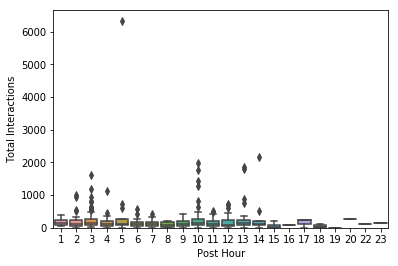

In [17]:
plot_box('Post Hour', 'Total Interactions')

The most active period can be found at around 3 and 10. The least active period is after 15.

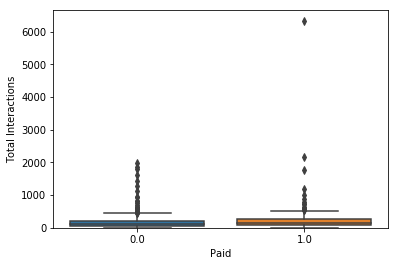

In [18]:
plot_box('Paid', 'Total Interactions')

There is not much difference between paid posts and non-paid posts that attract more interactions.

**OBSERVATIONS**

Input features that might not be able to improve the model to predict 'Total Interactions' are 'Category' and 'Paid'.

**Outliers**

Now I realize that there seems to be outlier value on every input features, the action of removing the outliers will be done in the next section. However, I want to check whether there is any outlier value in the prediction label 'Total Interactions'. I check it by standardizing the data as below:

In [8]:
total_interactions_data = np.array(df['Total Interactions'], dtype=float)
total_interactions_scaled = StandardScaler().fit_transform(total_interactions_data[:,np.newaxis]); 
print('low values:')
print(total_interactions_scaled[total_interactions_scaled[:,0].argsort()][:10])
print('\nhigh values:')
print(total_interactions_scaled[total_interactions_scaled[:,0].argsort()][-10:])

low values:
[[-9.31028281]
 [-9.31028281]
 [-9.31028281]
 [-9.31028281]
 [-9.31028281]
 [-1.18643739]
 [-1.18643739]
 [-1.05985263]
 [-1.05985263]
 [-0.97003931]]

high values:
[[0.79355029]
 [0.80382261]
 [0.83323948]
 [0.86736449]
 [0.90550696]
 [0.9332311 ]
 [0.93828491]
 [0.94965728]
 [0.966054  ]
 [0.99661361]]


There is one suspicious value 16.116458 that does not seem to follow the trend of the others. I will drop this specific observation because it seems that this particular observation makes the outlier value at every relation between feature and label plots above.

## 3. Data processing

**ACTION: Missing Value**

As mentioned in the missing value analysis above, I will drop all the observations with missing values.

In [19]:
df = df.dropna(axis=0)

In [10]:
check_missing_value(df)

,Total,Percent
Total Interactions,0,0.0
Lifetime Post Total Impressions,0,0.0
Type,0,0.0
Category,0,0.0
Post Month,0,0.0
Post Weekday,0,0.0
Post Hour,0,0.0
Paid,0,0.0
Lifetime Post Total Reach,0,0.0
Lifetime Engaged Users,0,0.0


Now we have a clean data without missing values.

**Action: Outliers**

Below I remove the outlier in 'Total Interactions' label:

In [20]:
df.sort_values(by = 'Total Interactions', ascending = False)[:1]
df = df.drop(df[df['Total Interactions'] == 6334].index)

As I believe that my data is clean now, I will check the plot again to make sure the outlier values do not exist.

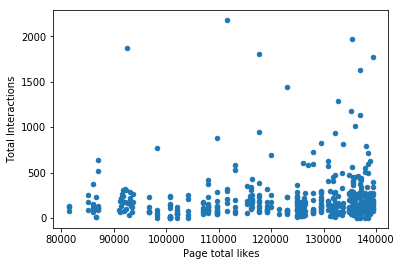

In [10]:
plot_scatter('Page total likes', 'Total Interactions')

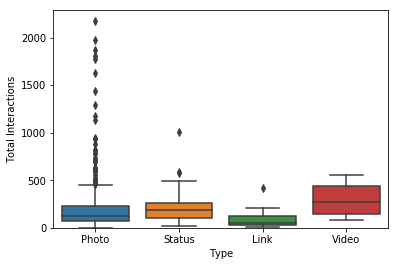

In [12]:
plot_box('Type', 'Total Interactions')

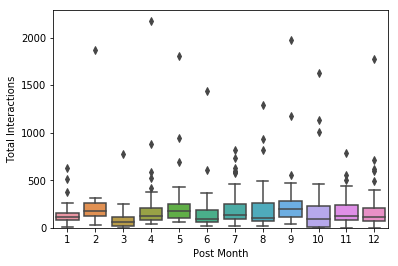

In [12]:
plot_box('Post Month', 'Total Interactions')

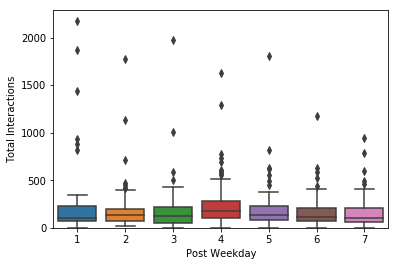

In [13]:
plot_box('Post Weekday', 'Total Interactions')

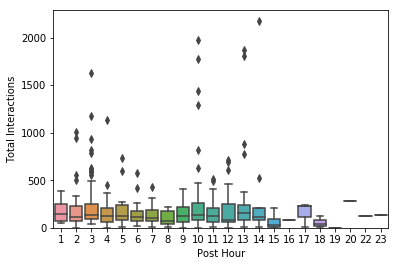

In [14]:
plot_box('Post Hour', 'Total Interactions')

**OBSERVATIONS**

I omit checking the input features 'Category' and 'Paid' as both features might not improve the model. As for the other input features, the plots show a better representation of the relation between input features and the label.

**Data Transformation**

From the previous analysis, I know that label 'Total Interactions' is not really suitable to be solved by regression. Regression problem often has the assumption that the data are normally distributed. However, our label is not and therefore, I need to apply some tranformation.

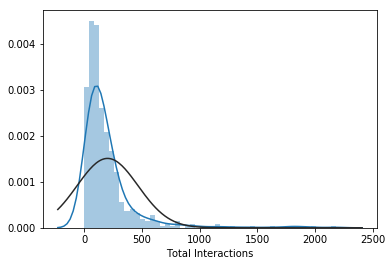

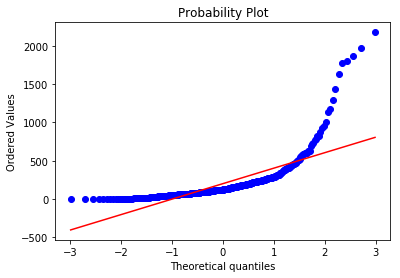

In [21]:
sns.distplot(df['Total Interactions'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Total Interactions'], plot=plt)

I notice that it is skewed and not normally distributed. Therefore, I apply log transformation to solve the problem. However, because 'Total Interactions' has some values equal to zero, this might lead to a failure in the transformation. Thus, I assign the zero values with a very small value so their value meaning does not change.

In [5]:
df.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [22]:
# Replacing the zeros
df['Total Interactions'][df['Total Interactions'] == 0] = 0.00000000001

In [23]:
# Applying log transformation
df['Total Interactions'] = np.log(df['Total Interactions'])

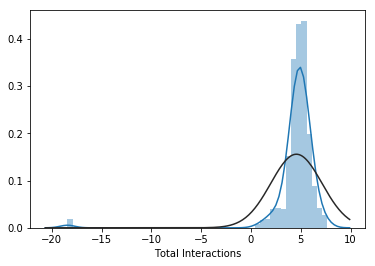

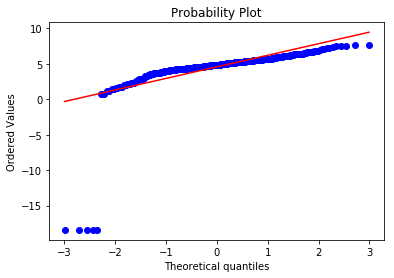

In [18]:
sns.distplot(df['Total Interactions'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Total Interactions'], plot=plt)

The new 'Total Interactions' is looking better and more normally distributed than before.

**Categorical Feature Handling**

In [24]:
df = pd.get_dummies(df)

In [9]:
df.columns

Index(['Page total likes', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions', 'Type_Link',
       'Type_Photo', 'Type_Status', 'Type_Video'],
      dtype='object')

The 'Type' feature is splitted into four one-hot encoding: 'Type_Link', 'Type_Photo', 'Type_Status', 'Type_Video'

Now that I finish preprocessing the data, I finally can start with modelling.

## 4. Modelling

The baseline model will be the regression model. Therefore, let's find the best regression algorithm.

In [25]:
input_features = ['Page total likes', 'Type_Link', 'Type_Photo', 'Type_Status', 'Type_Video', 
               'Post Month', 'Post Weekday', 'Post Hour']

X = df[input_features]
Y = df['Total Interactions']

LinR: -10.759988 (12.502309)
BR: -10.630531 (12.801526)
KNR: -12.213585 (14.902521)
GPR: -30.008936 (7.776579)
SVR: -10.515831 (13.069195)
MLPR: -12.019314 (12.718283)


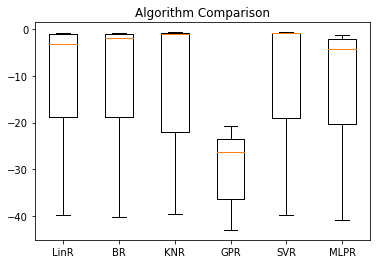

In [26]:
# choose algorithms to be compared
models = []
models.append(('LinR', LinearRegression()))
models.append(('BR', BayesianRidge()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('GPR', GaussianProcessRegressor()))
models.append(('SVR', SVR()))
models.append(('MLPR', MLPRegressor()))

# evaluate the models of regression algorithm
results = []
names = []
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=10)
    score = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(score)
    names.append(name)
    print('%s: %f (%f)' % (name, score.mean(), score.std()))
    
fig = plt.figure()
plt.title('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**OBSERVATIONS**

I choose six different algorithm to be compared using k-fold cross validation with the same set of data. Plotting the algorithms in the box plot, it is obvious that the lowest performance algorithm is Gaussian Process Regression. On the other hand, there are four algorithms that seem to have similar performance; they are Linear Regression, Bayesian Ridge Regression, K Neighbors Regression, and Support Vector Regression. I want to evaluate the four of them to see if there is any performance difference if the data are split into training and test.

## 5. Evaluation

For the evaluation metric, I will use Root Mean Square Error.

**SPLIT TRAINING AND TEST DATA**

In [27]:
# 80% training, 20% testing
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

**LINEAR REGRESSION**

In [28]:
linR_model = LinearRegression()
linR_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
print('Making predictions for the Total Interactions from Linear Regression model:')
print(Y_test.head())
print('\nThe predictions are')
predicted_total_iteractions = linR_model.predict(X_test)
print(predicted_total_iteractions[:5])
print('\nRMSE = ',np.sqrt(mean_absolute_error(Y_test, predicted_total_iteractions)))

Making predictions for the Total Interactions from Linear Regression model:
460    7.535297
73     5.451038
315    5.384495
179    5.267858
337    4.595120
Name: Total Interactions, dtype: float64

The predictions are
[4.08069211 4.37905566 4.82358713 4.47750559 4.70329806]

RMSE =  1.1240027361251048


**BAYESIAN RIDGE**

In [30]:
br_model = BayesianRidge()
br_model.fit(X_train,Y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [31]:
print('Making predictions for the Total Interactions from Bayesian Ridge Model:')
print(Y_test.head())
print('\nThe predictions are')
predicted_total_iteractions = br_model.predict(X_test)
print(predicted_total_iteractions[:5])
print('\nRMSE = ',np.sqrt(mean_absolute_error(Y_test, predicted_total_iteractions)))

Making predictions for the Total Interactions from Bayesian Ridge Model:
460    7.535297
73     5.451038
315    5.384495
179    5.267858
337    4.595120
Name: Total Interactions, dtype: float64

The predictions are
[4.22493249 4.64521699 4.52531637 4.61995576 4.47210602]

RMSE =  1.086844430542999


**K NEIGHBORS REGRESSION**

In [32]:
knr_model = KNeighborsRegressor()
knr_model.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [33]:
print('Making predictions for the Total Interactions from K Neigbors Regression model:')
print(Y_test.head())
print('\nThe predictions are')
predicted_total_iteractions = knr_model.predict(X_test)
print(predicted_total_iteractions[:5])
print('\nRMSE = ',np.sqrt(mean_absolute_error(Y_test, predicted_total_iteractions)))

Making predictions for the Total Interactions from K Neigbors Regression model:
460    7.535297
73     5.451038
315    5.384495
179    5.267858
337    4.595120
Name: Total Interactions, dtype: float64

The predictions are
[5.13502981 5.51621296 4.59401587 5.70705248 4.87243224]

RMSE =  1.2435636919921076


**SUPPORT VECTOR REGRESSION**

In [34]:
svr_model = SVR()
svr_model.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
print('Making predictions for the Total Interactions for Support Vector Regression model:')
print(Y_test.head())
print('\nThe predictions are')
predicted_total_iteractions = svr_model.predict(X_test)
print(predicted_total_iteractions[:5])
print('\nRMSE = ',np.sqrt(mean_absolute_error(Y_test, predicted_total_iteractions)))

Making predictions for the Total Interactions for Support Vector Regression model:
460    7.535297
73     5.451038
315    5.384495
179    5.267858
337    4.595120
Name: Total Interactions, dtype: float64

The predictions are
[4.88286158 5.48939095 4.63978323 5.15327705 5.02303994]

RMSE =  1.0778147255937696


**OBSERVATIONS**

Below are the list of RMSE for each algorithms:
- Linear Regression = 1.1240027361251048
- Bayesian Ridge = 1.086844430542999
- K Neighbors Regressor = 1.2435636919921076
- Support Vector Machine = 1.0778147255937696

Both Bayesian Ridge and Support Vector Machine have better result than the other two algorithms. However, overall speaking all the models don't provide satisfactory results as the RMSEs are quite big for each of them. From my understanding, one reason this can happen is the input features that are uncorrelated with the label.

## 6. Discussion & Next Steps

During the analysis, we realize a few things:
- The data have some missing values and outliers, which can be solved by removing them.
- The input features for the model are highly uncorrelated with the labels, this would lower the prediction result of the model.
- The label itself is not normally distributed although we need to use regression. Therefore, data transformation is needed.
- The resulting prediction models using several algorithms do not give a good performance. This is as expected because of the correlation between input features and label, the small dataset, and the default hyperparameter.

As for the next step, what we can do to improve the model are:
- Gather more sample data, as we know that prediction model usually works better with more data. 
- Create a deep analysis on the data and create a better predictive features
- Find a better hyperparameter of the model
- Explore new features through feature engineering

## 7. Recommendation & Feature Engineering
To maximise the posts performance metric, I will do a simple feature engineering to find a possible new feature. The way I do this is to find the summation of all 12 prediction labels, and normalize it by 12. This new feature will be called 'Post Score' to represent the overall score of the posts and this will be the new label that I will try predicting.

In [36]:
df['Post Score'] = (df['Lifetime Post Total Reach'] + df['Lifetime Post Total Impressions'] + 
                    df['Lifetime Engaged Users'] + df['Lifetime Post Consumers'] +
                    df['Lifetime Post Consumptions'] + df['Lifetime Post Impressions by people who have liked your Page'] +
                    df['Lifetime Post reach by people who like your Page'] + 
                    df['Lifetime People who have liked your Page and engaged with your post'] +
                    df['comment'] + df['like'] + df['share'] + np.exp(df['Total Interactions']))/12

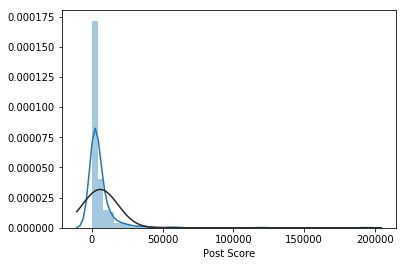

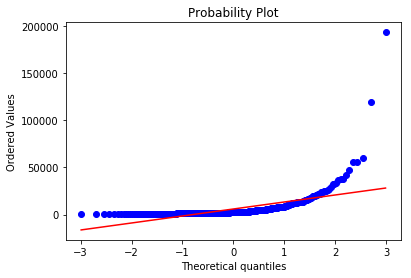

In [39]:
sns.distplot(df['Post Score'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Post Score'], plot=plt)

It is still has a positive skewness and looks similar to the 'Total Interactions' plot. So I will do the same log transformation as well.

In [40]:
df['Post Score'][df['Post Score'] == 0] = 0.00000000001
df['Post Score'] = np.log(df['Post Score'])

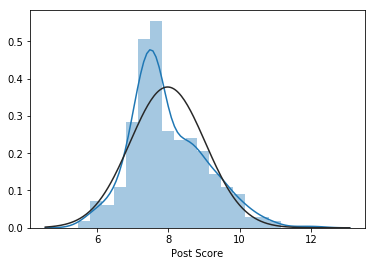

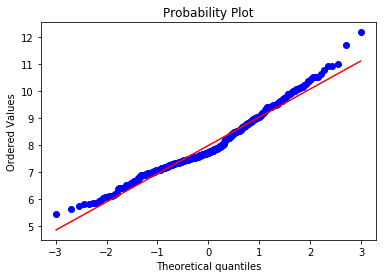

In [41]:
sns.distplot(df['Post Score'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Post Score'], plot=plt)

After the transformation, the data distribution is better than the distribution for 'Total Interactions'. It is closer to the normal distribution and much less skewed.

Now, I will evaluate the models using the same four algorithms: Linear Regression, Bayesian Ridge, K Neighbors Regressor, and Support Vector Regression.

In [43]:
input_features = ['Page total likes', 'Type_Link', 'Type_Photo', 'Type_Status', 'Type_Video', 
               'Post Month', 'Post Weekday', 'Post Hour']

X_fe = df[input_features]
Y_fe = df['Post Score']

In [44]:
# split the training and test data
X_train_fe, X_test_fe, Y_train_fe, Y_test_fe = model_selection.train_test_split(X_fe, Y_fe, test_size=0.2, random_state=42)

**LINEAR REGRESSION**

In [48]:
linR_model_fe = LinearRegression()
linR_model_fe.fit(X_train_fe,Y_train_fe)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
print('Making predictions for the Total Interactions from Linear Regression model:')
print(Y_test_fe.head())
print('\nThe predictions are')
predicted_total_iteractions = linR_model_fe.predict(X_test)
print(predicted_total_iteractions[:5])
print('\nRMSE = ',np.sqrt(mean_absolute_error(Y_test_fe, predicted_total_iteractions)))

Making predictions for the Total Interactions from Linear Regression model:
460    11.694789
73      8.781466
315     9.496828
179     7.337208
337     7.145130
Name: Post Score, dtype: float64

The predictions are
[8.10610926 7.59314344 7.95204044 7.70397271 7.99685085]

RMSE =  0.9271581658749838


**BAYESIAN RIDGE**

In [50]:
br_model_fe = BayesianRidge()
br_model_fe.fit(X_train_fe,Y_train_fe)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [51]:
print('Making predictions for the Total Interactions from Bayesian Ridge Model:')
print(Y_test_fe.head())
print('\nThe predictions are')
predicted_total_iteractions = br_model_fe.predict(X_test_fe)
print(predicted_total_iteractions[:5])
print('\nRMSE = ',np.sqrt(mean_absolute_error(Y_test_fe, predicted_total_iteractions)))

Making predictions for the Total Interactions from Bayesian Ridge Model:
460    11.694789
73      8.781466
315     9.496828
179     7.337208
337     7.145130
Name: Post Score, dtype: float64

The predictions are
[8.1009415  7.61171302 7.95289751 7.72958454 7.99606402]

RMSE =  0.9251512792916597


**K NEIGHBORS REGRESSION**

In [52]:
knr_model_fe = KNeighborsRegressor()
knr_model_fe.fit(X_train_fe,Y_train_fe)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [53]:
print('Making predictions for the Total Interactions from K Neigbors Regression model:')
print(Y_test_fe.head())
print('\nThe predictions are')
predicted_total_iteractions = knr_model_fe.predict(X_test_fe)
print(predicted_total_iteractions[:5])
print('\nRMSE = ',np.sqrt(mean_absolute_error(Y_test_fe, predicted_total_iteractions)))

Making predictions for the Total Interactions from K Neigbors Regression model:
460    11.694789
73      8.781466
315     9.496828
179     7.337208
337     7.145130
Name: Post Score, dtype: float64

The predictions are
[8.23720084 9.28573997 7.7806694  8.44436835 7.4786269 ]

RMSE =  0.9862603142459401


**SUPPORT VECTOR MACHINE**

In [54]:
svr_model_fe = SVR()
svr_model_fe.fit(X_train_fe,Y_train_fe)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
print('Making predictions for the Total Interactions for Support Vector Regression model:')
print(Y_test_fe.head())
print('\nThe predictions are')
predicted_total_iteractions = svr_model_fe.predict(X_test_fe)
print(predicted_total_iteractions[:5])
print('\nRMSE = ',np.sqrt(mean_absolute_error(Y_test_fe, predicted_total_iteractions)))

Making predictions for the Total Interactions for Support Vector Regression model:
460    11.694789
73      8.781466
315     9.496828
179     7.337208
337     7.145130
Name: Post Score, dtype: float64

The predictions are
[7.9068668  8.51342094 8.1403015  8.04424966 7.82953569]

RMSE =  0.9535328218334743


**OBSERVATIONS**

Below are the list of RMSE for each algorithms for the new label 'Post Score':
- Linear Regression = 0.9271581658749838
- Bayesian Ridge = 0.9251512792916597
- K Neighbors Regressor = 0.9862603142459401
- Support Vector Machine = 0.9535328218334743

Compared with the RMSE from the previous label 'Total Interactions', there are improvements from all algorithms. This means that the new label feature has a better representation for Facebook posts impact.

However, to get an even better performace from each model, I believe that there are many other features that could be engineered to improve it.